In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open('..\\data\\oscar_wind_data_U.json', 'r') as datafile:
    u = json.load(datafile)[0]

with open('..\\data\\oscar_wind_data_V.json', 'r') as datafile:
    v = json.load(datafile)[0]

print(u['header'])
print(v['header'])

u_data = u['data']
v_data = v['data']

print(len(u_data))
print(len(v_data))

with open('..\\data\\oscar_current_data_U.json', 'r') as datafile:
    current_u = json.load(datafile)[0]

with open('..\\data\\oscar_current_data_V.json', 'r') as datafile:
    current_v = json.load(datafile)[0]

print(current_u['header'])
print(current_v['header'])

current_u_data = current_u['data']
current_v_data = current_v['data']

print(len(current_u_data))
print(len(current_v_data))

{'discipline': 0, 'disciplineName': 'Meteorological products', 'gribEdition': 2, 'gribLength': 131858, 'center': 7, 'centerName': 'US National Weather Service - NCEP(WMC)', 'subcenter': 0, 'refTime': '2014-01-31T00:00:00.000Z', 'significanceOfRT': 1, 'significanceOfRTName': 'Start of forecast', 'productStatus': 0, 'productStatusName': 'Operational products', 'productType': 1, 'productTypeName': 'Forecast products', 'productDefinitionTemplate': 0, 'productDefinitionTemplateName': 'Analysis/forecast at horizontal level/layer at a point in time', 'parameterCategory': 2, 'parameterCategoryName': 'Momentum', 'parameterNumber': 2, 'parameterNumberName': 'U-component_of_wind', 'parameterUnit': 'm.s-1', 'genProcessType': 2, 'genProcessTypeName': 'Forecast', 'forecastTime': 3, 'surface1Type': 103, 'surface1TypeName': 'Specified height level above ground', 'surface1Value': 10, 'surface2Type': 255, 'surface2TypeName': 'Missing', 'surface2Value': 0, 'gridDefinitionTemplate': 0, 'gridDefinitionTemp

In [3]:
def magnitude(u, v):
    if (u == None or v == None):
        return 0.0
    return (np.sqrt(pow(u, 2) + pow(v, 2)))

current_magnitudes = []
wind_magnitudes = []
for i in range(len(current_u_data)):
    if (current_u_data[i] == None or current_v_data[i] == None):
        continue
    current_magnitudes.append(magnitude(current_u_data[i], current_v_data[i]))

for i in range(len(u_data)):
    wind_magnitudes.append(magnitude(u_data[i], v_data[i]) * .03)

Text(0, 0.5, 'Relative Frequency')

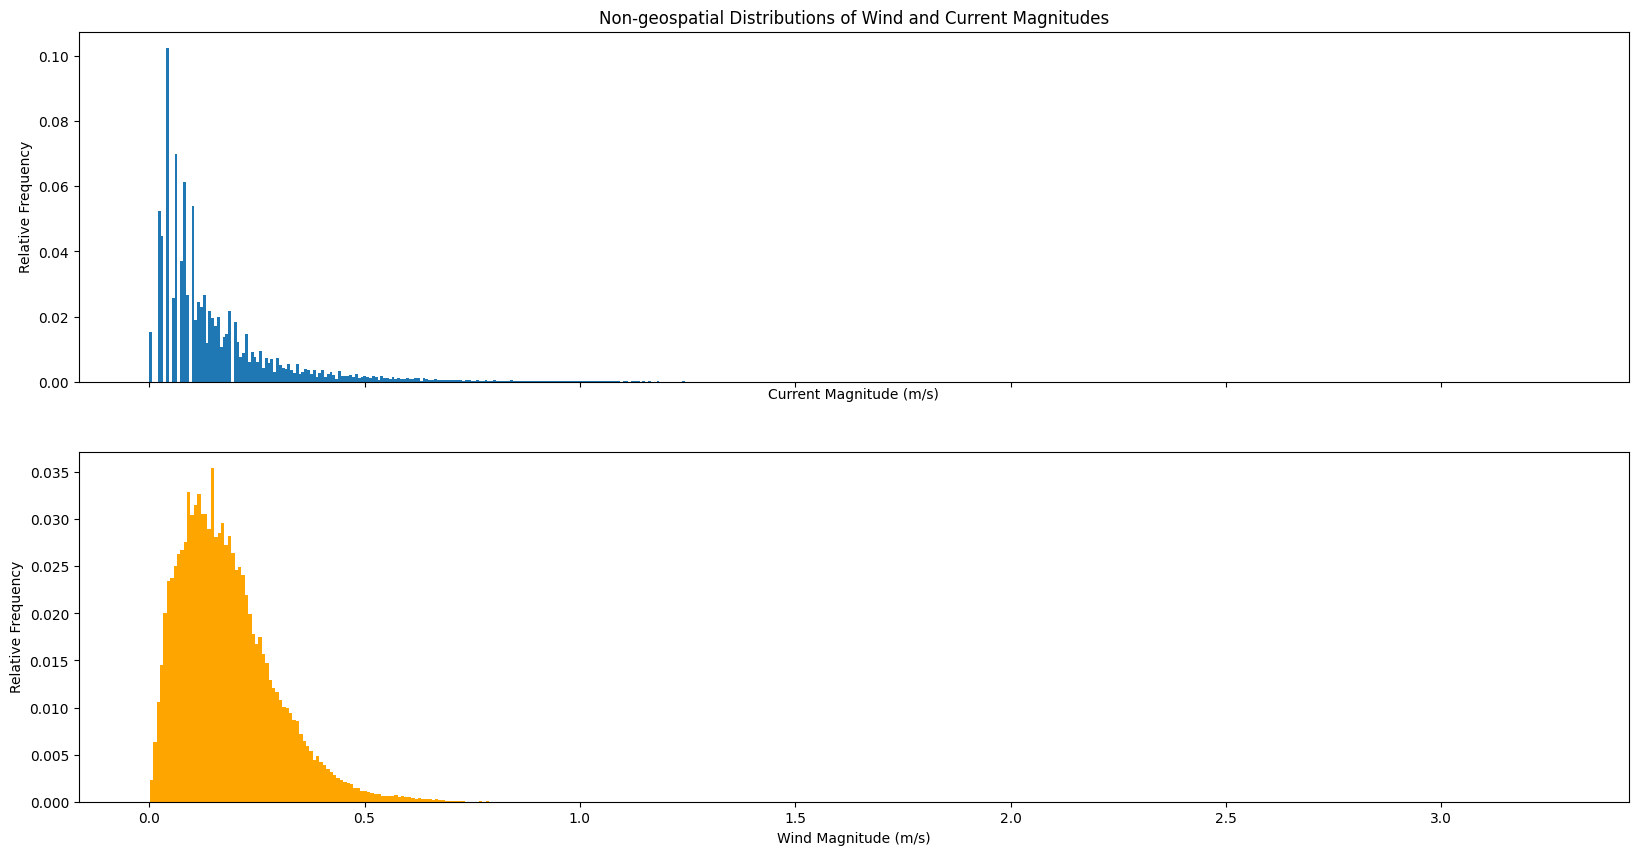

In [7]:
fig, ax = plt.subplots(2, sharex=True, figsize=(20, 10))
ax[0].hist(current_magnitudes, bins=500, weights=np.ones_like(current_magnitudes) / len(current_magnitudes))
ax[1].hist(wind_magnitudes, bins=100, weights=np.ones_like(wind_magnitudes) / len(wind_magnitudes), color='orange')
ax[0].set_title('Non-geospatial Distributions of Wind and Current Magnitudes')
ax[1].set_xlabel('Wind Magnitude (m/s)')
ax[1].set_ylabel('Relative Frequency')
ax[0].set_xlabel('Current Magnitude (m/s)')
ax[0].set_ylabel('Relative Frequency')

#ax[0].boxplot(current_magnitudes)
#ax[0].boxplot(wind_magnitudes)

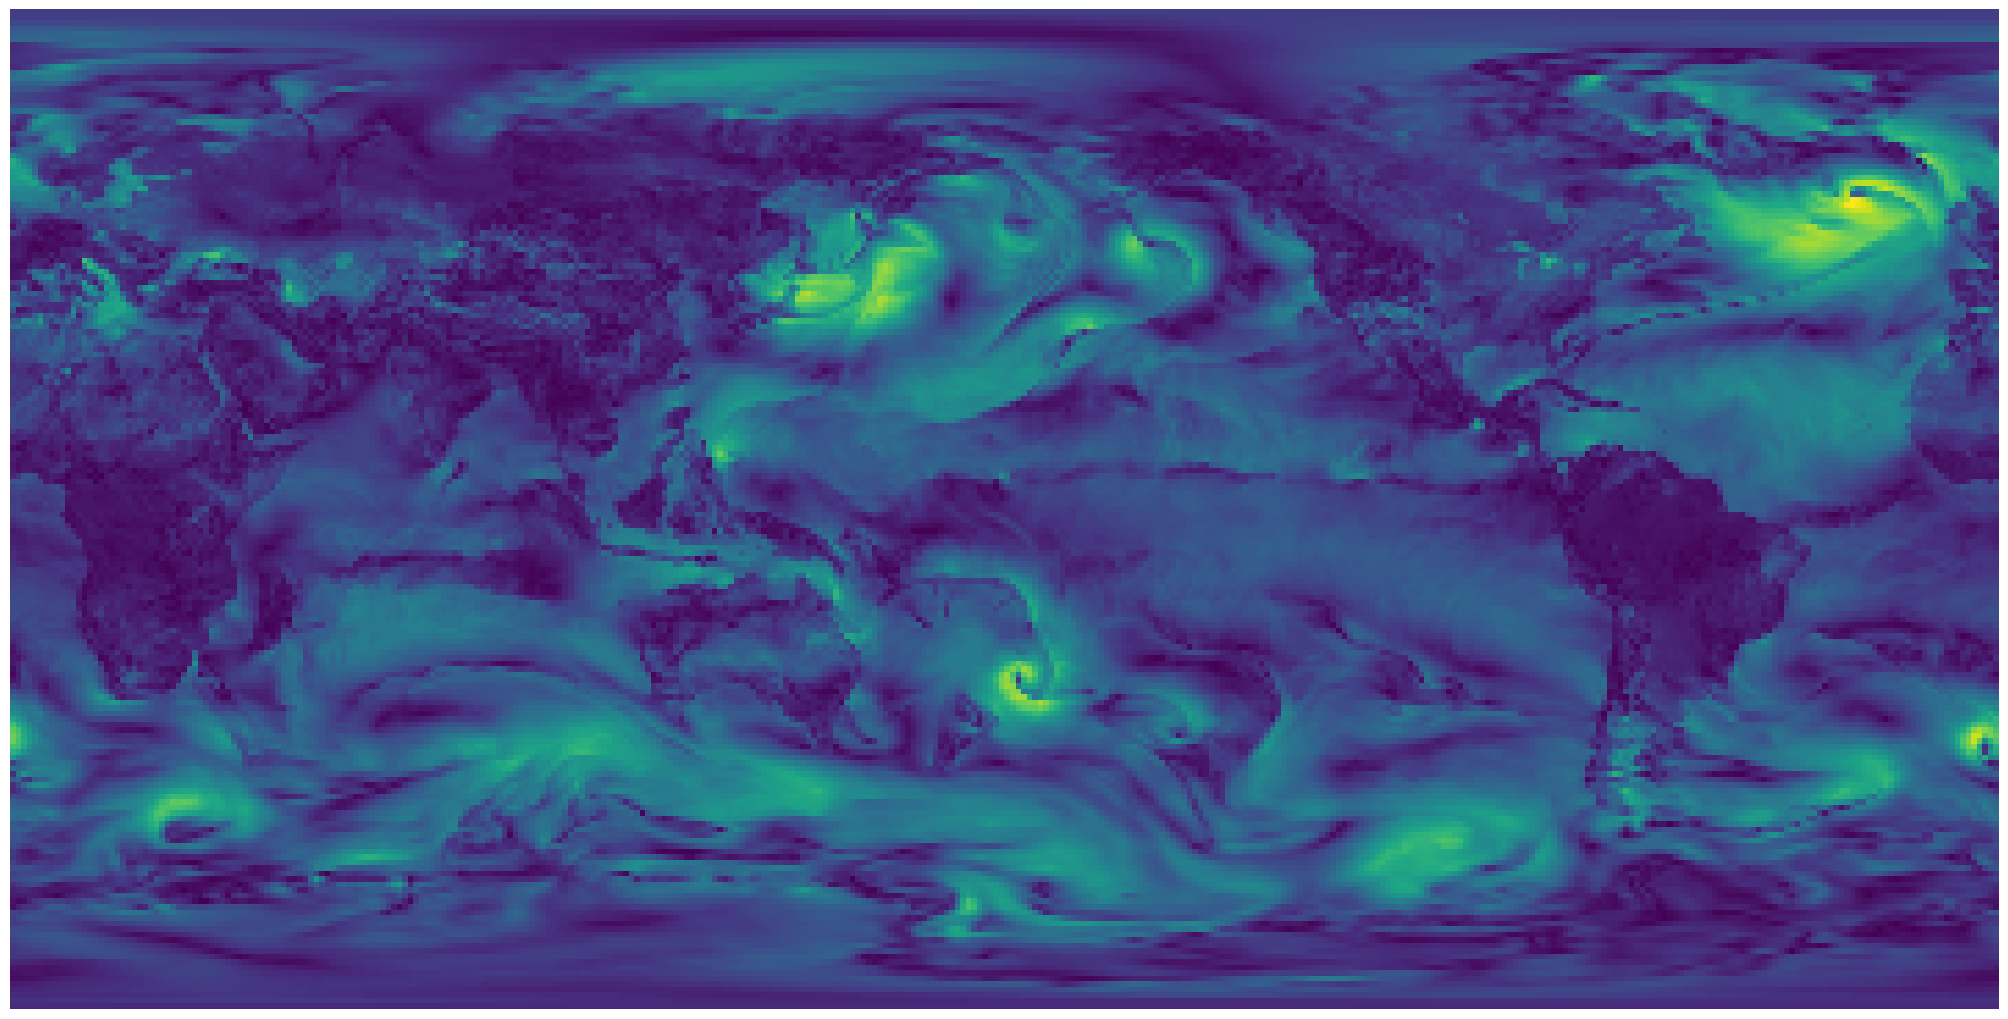

In [38]:
fig, ax = plt.subplots(1, figsize=(20, 10))

current_magnitudes = np.ones((181, 360))

for i in range(len(u_data)):
    r = int(i / 360)
    c = i % 360
    current_magnitudes[r][c] += magnitude(u_data[i], v_data[i])

ax.imshow(current_magnitudes)
plt.axis('off')
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0, 0)